In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('telcodata.xlsx')

In [3]:
df.has_internet.head()

0    True
1    True
2    True
3    True
4    True
Name: has_internet, dtype: bool

In [4]:
df_g = df.set_index('start_date')

In [5]:
df_g.index = pd.to_datetime(df_g.index, format='%Y-%m')

## All Data

In [6]:
seniors = df_g[df_g['is_senior_citizen'] == 1]
adults = df_g[df_g['is_senior_citizen'] == 0]
partners_childless = df_g[(df_g['partner'] == 'Yes') & (df_g['dependents'] == 'No')]
single = df_g[(df_g['partner'] == 'No') & (df_g['dependents'] == 'No')]
married_children = df_g[(df_g['partner'] == 'Yes') & (df_g['dependents'] == 'Yes')]
men = df_g[df_g['gender'] == 'Male']
female = df_g[df_g['gender'] == 'Female']

In [7]:
m = men.groupby(pd.Grouper(freq='Y')).customer_id.count()
f = adults.groupby(pd.Grouper(freq='Y')).customer_id.count()

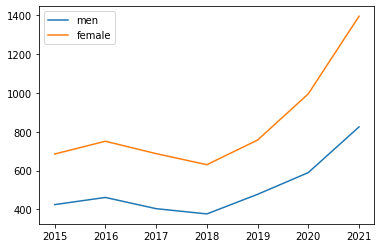

In [8]:
sns.lineplot(data=m, legend='brief', label='men')
sns.lineplot(data=f, legend='brief', label='female');

In [9]:
s = seniors.groupby(pd.Grouper(freq='Y')).customer_id.count()
a = adults.groupby(pd.Grouper(freq='Y')).customer_id.count()
p = partners_childless.groupby(pd.Grouper(freq='Y')).customer_id.count()
si = single.groupby(pd.Grouper(freq='Y')).customer_id.count()
mc = married_children.groupby(pd.Grouper(freq='Y')).customer_id.count()

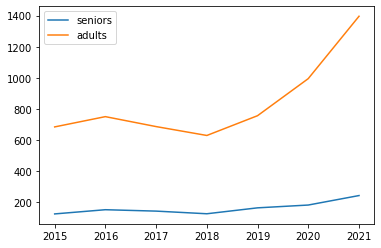

In [10]:
sns.lineplot(data=s, legend='brief', label='seniors')
sns.lineplot(data=a, legend='brief', label='adults');

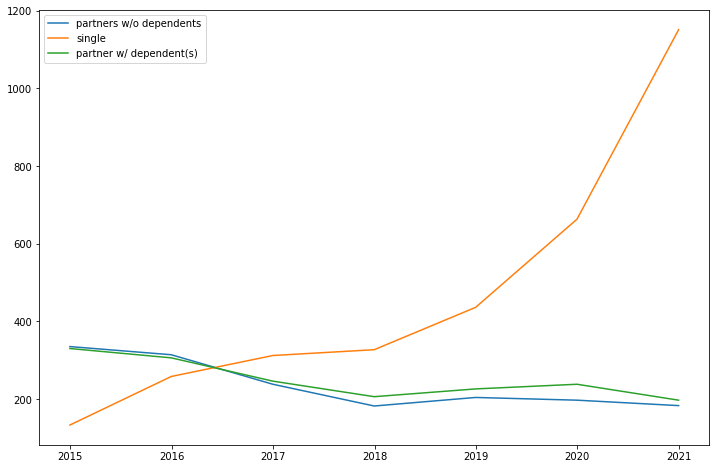

In [11]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=p, legend='brief', label='partners w/o dependents')
sns.lineplot(data=si, legend='brief', label='single')
sns.lineplot(data=mc, legend='brief', label='partner w/ dependent(s)')
plt.legend();

## Churned Data

In [12]:
senior_churn = seniors[seniors.churn == 'Yes']
adult_churn = adults[adults.churn == 'Yes']
partner_churn = partners_childless[partners_childless.churn == 'Yes']
single_churn = single[single.churn == 'Yes']
married_dependent_churn = married_children[married_children.churn == 'Yes']
men_churn = men[men.churn == 'Yes']
female_churn = female[female.churn == 'Yes']

In [13]:
men_c = men_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()
female_c = female_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()

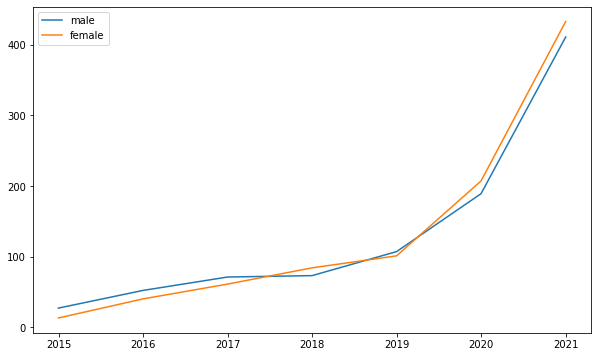

In [14]:
plt.figure(figsize=(10, 6));
sns.lineplot(data=men_c, legend='brief', label='male')
sns.lineplot(data=female_c, legend='brief', label='female');

In [15]:
sc = senior_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()
ac = adult_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()

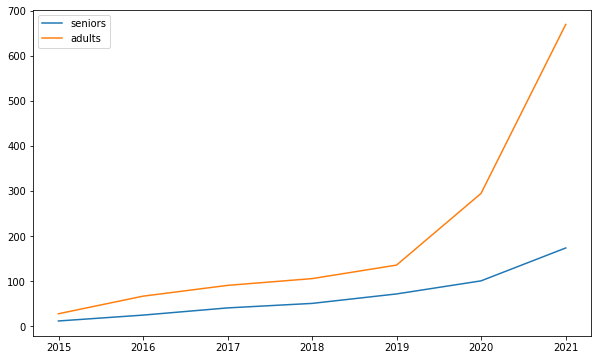

In [16]:
plt.figure(figsize=(10, 6));
sns.lineplot(data=sc, legend='brief', label='seniors')
sns.lineplot(data=ac, legend='brief', label='adults');

In [17]:
pc = partner_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()
sc = single_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()
mdc = married_dependent_churn.groupby(pd.Grouper(freq='Y')).customer_id.count()

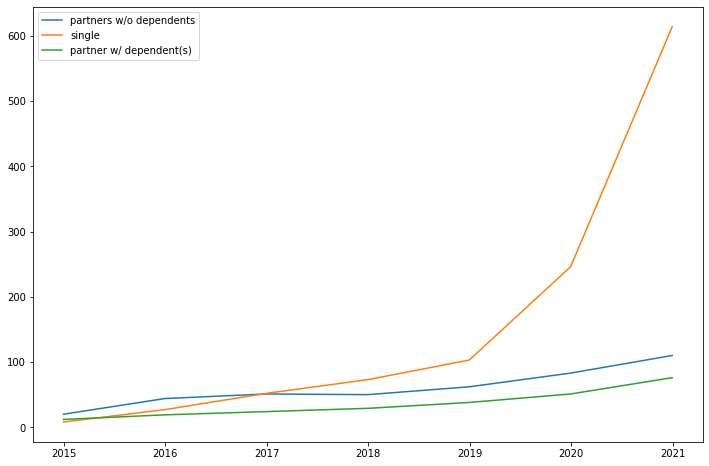

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pc, legend='brief', label='partners w/o dependents')
sns.lineplot(data=sc, legend='brief', label='single')
sns.lineplot(data=mdc, legend='brief', label='partner w/ dependent(s)')
plt.legend();

# Contracts

In [19]:
df_contract = df.groupby(by='contract_type_description')

In [20]:
revenue_per_contract = df_contract['total_charges'].sum()
total_revenue = revenue_per_contract.sum()

In [21]:
revenue_per_contract

contract_type_description
1 Year            4467053.5
2 Year            6283253.7
Month-to-Month    5305861.5
Name: total_charges, dtype: float64

In [22]:
revenue_per_contract/total_revenue

contract_type_description
1 Year            0.278214
2 Year            0.391330
Month-to-Month    0.330456
Name: total_charges, dtype: float64

## Churned Contracts

In [23]:
df_churned = df[df.churn == 'Yes']

In [24]:
df_churned_contracts = df_churned.groupby(by='contract_type_description')

In [25]:
revenue_per_contract_churned = df_churned_contracts['total_charges'].sum()
total_revenue_churned = revenue_per_contract_churned.sum()

In [26]:
revenue_per_contract_churned

contract_type_description
1 Year             674991.20
2 Year             260753.45
Month-to-Month    1927182.25
Name: total_charges, dtype: float64

In [27]:
churned_pct = revenue_per_contract_churned/total_revenue_churned

In [28]:
churned_pct

contract_type_description
1 Year            0.235770
2 Year            0.091079
Month-to-Month    0.673151
Name: total_charges, dtype: float64

In [29]:
total_revenue_churned/total_revenue

0.17830697680698882

## Nonchurned Contracts

In [30]:
df_nonchurned = df[df.has_churned == False]
df_nonchurned = df_nonchurned.groupby(by='contract_type_description')

In [31]:
revenue_per_nonchurned_contract = df_nonchurned['total_charges'].sum()
total_revenue_nonchurned = revenue_per_nonchurned_contract.sum()

In [32]:
revenue_per_nonchurned_contract

contract_type_description
1 Year            3792062.30
2 Year            6022500.25
Month-to-Month    3378679.25
Name: total_charges, dtype: float64

In [33]:
nonchurned_pct = revenue_per_nonchurned_contract/total_revenue_nonchurned

In [34]:
nonchurned_pct

contract_type_description
1 Year            0.287425
2 Year            0.456484
Month-to-Month    0.256092
Name: total_charges, dtype: float64

In [35]:
(revenue_per_nonchurned_contract-revenue_per_contract_churned)/revenue_per_contract

contract_type_description
1 Year            0.697791
2 Year            0.917001
Month-to-Month    0.273565
Name: total_charges, dtype: float64

In [36]:
revenue_per_nonchurned_contract/revenue_per_contract_churned

contract_type_description
1 Year             5.617943
2 Year            23.096531
Month-to-Month     1.753171
Name: total_charges, dtype: float64

In [37]:
revenue_per_contract_churned/revenue_per_contract

contract_type_description
1 Year            0.151104
2 Year            0.041500
Month-to-Month    0.363218
Name: total_charges, dtype: float64

# Services

In [88]:
services = df.groupby(by='service_type')

In [96]:
services_average_cost = services['monthly_charges'].mean()

In [106]:
services_average_cost

service_type
internet only       42.028592
phone & internet    81.755171
phone only          21.079194
Name: monthly_charges, dtype: float64

## Internet Services

In [99]:
internet_providers = df.groupby(by='internet_service_description')

In [100]:
basic_internet = df[(df['has_internet'] == True) & (df['has_phone']) == False]

In [101]:
basic_internet.groupby('internet_service_description')['monthly_charges'].mean()

internet_service_description
DSL                    42.028592
No Internet Service    21.079194
Name: monthly_charges, dtype: float64

In [103]:
internet = internet_providers['monthly_charges'].mean()

## Phone Services

In [44]:
phone_services = df.groupby(by='phone_service_description')

In [45]:
phone_only = df[(df['has_internet'] == False) & (df['has_phone']) == True]

In [46]:
phone_only.groupby('phone_service_description')['monthly_charges'].mean()

phone_service_description
One Line             19.955152
Two or More Lines    24.970614
Name: monthly_charges, dtype: float64

In [70]:
phone = phone_services['monthly_charges'].mean()

In [74]:
phone

phone_service_description
No Phone Service     42.028592
One Line             54.195059
Two or More Lines    82.036974
Name: monthly_charges, dtype: float64

# How much is Fiber Optic

In [105]:
internet-services_average_cost['phone only']

internet_service_description
DSL                    37.022975
Fiber Optic            70.420935
No Internet Service     0.000000
Name: monthly_charges, dtype: float64

# Bundled Services - Churn

In [48]:
bundles_churned = df_churned.groupby(
    by=['contract_type_description','internet_service_description', 'phone_service_description'])

In [49]:
bundled_tenure = round(
    bundles_churned['customer_tenure-in-months'].mean().unstack().unstack())

In [50]:
bundle_charge = bundles_churned['monthly_charges'].mean().unstack(fill_value=0).unstack(fill_value=0)

In [51]:
num_bundled_contracts_churn = bundles_churned.service_type.count().unstack().unstack()

In [108]:
num_bundled_contracts_churn

phone_service_description    No Phone Service                                  \
internet_service_description              DSL Fiber Optic No Internet Service   
contract_type_description                                                       
1 Year                                   14.0         NaN                 NaN   
2 Year                                    3.0         NaN                 NaN   
Month-to-Month                          153.0         NaN                 NaN   

phone_service_description    One Line                                  \
internet_service_description      DSL Fiber Optic No Internet Service   
contract_type_description                                               
1 Year                           22.0        30.0                 7.0   
2 Year                            4.0         4.0                 2.0   
Month-to-Month                  190.0       496.0                94.0   

phone_service_description    Two or More Lines                                  
internet_service_description               DSL Fiber Optic No Internet Service  
contract_type_description                                                       
1 Year                                    17.0        74.0                 2.0  
2 Year                                     5.0        27.0                 3.0  
Month-to-Month                            51.0       666.0                 5.0

In [109]:
num_bundled_contracts_churn.sum(axis=1)

contract_type_description
1 Year             166.0
2 Year              48.0
Month-to-Month    1655.0
dtype: float64

In [62]:
bundle_charge

phone_service_description    No Phone Service                                  \
internet_service_description              DSL Fiber Optic No Internet Service   
contract_type_description                                                       
1 Year                              46.535714         0.0                 0.0   
2 Year                              50.466667         0.0                 0.0   
Month-to-Month                      36.456536         0.0                 0.0   

phone_service_description      One Line                                  \
internet_service_description        DSL Fiber Optic No Internet Service   
contract_type_description                                                 
1 Year                        66.593182   98.148333           20.007143   
2 Year                        64.225000   95.237500           19.550000   
Month-to-Month                51.562895   80.929234           19.949468   

phone_service_description    Two or More Lines                                  
internet_service_description               DSL Fiber Optic No Internet Service  
contract_type_description                                                       
1 Year                               72.923529  103.074324               25.10  
2 Year                               79.480000  106.116667               24.80  
Month-to-Month                       58.675490   90.602252               24.52

### Singles Bundles - Total

In [53]:
bundles_single = single.groupby(
    by=['contract_type_description','internet_service_description', 'phone_service_description'])

In [54]:
single_tenure = round(bundles_single['customer_tenure-in-months'].mean().unstack(fill_value=0).unstack(fill_value=0))

In [55]:
single_bundle_charge = bundles_single['monthly_charges'].mean().unstack(fill_value=0).unstack(fill_value=0)

In [56]:
single_bundle_contracts = bundles_single['service_type'].count().unstack(fill_value=0).unstack(fill_value=0)

### Singles Bundles - Churned

In [57]:
bundles_single_churn = single_churn.groupby(by=['contract_type_description','internet_service_description', 'phone_service_description'])

In [118]:
single_bundle_churned_contracts.sum(axis=1)/num_bundled_contracts_churn.sum(axis=1)

contract_type_description
1 Year            0.367470
2 Year            0.312500
Month-to-Month    0.632628
dtype: float64

In [114]:
single_tenure_churn = round(bundles_single_churn['customer_tenure-in-months'].mean().unstack().unstack())

In [115]:
single_bundle_churned_charge = bundles_single_churn['monthly_charges'].mean().unstack(fill_value=0).unstack(fill_value=0)

In [116]:
single_bundle_churned_charge

phone_service_description    No Phone Service                                  \
internet_service_description              DSL Fiber Optic No Internet Service   
contract_type_description                                                       
1 Year                              45.880000         0.0                 0.0   
2 Year                               0.000000         0.0                 0.0   
Month-to-Month                      35.647959         0.0                 0.0   

phone_service_description      One Line                                  \
internet_service_description        DSL Fiber Optic No Internet Service   
contract_type_description                                                 
1 Year                        67.218182   98.565000           19.850000   
2 Year                        62.275000   87.850000           19.350000   
Month-to-Month                51.185185   80.792121           19.981343   

phone_service_description    Two or More Lines                                  
internet_service_description               DSL Fiber Optic No Internet Service  
contract_type_description                                                       
1 Year                               77.908333  104.538000               25.10  
2 Year                                0.000000  108.905556               24.75  
Month-to-Month                       57.322973   89.280371               24.20

In [60]:
single_bundle_churned_contracts = bundles_single_churn['monthly_charges'].count().unstack().unstack()

# Singles % of Total Bundled Packages - Churned

In [110]:
total_pct_of_single_bundles_churn = round(
    single_bundle_churned_contracts/num_bundled_contracts_churn, 3).fillna(0)

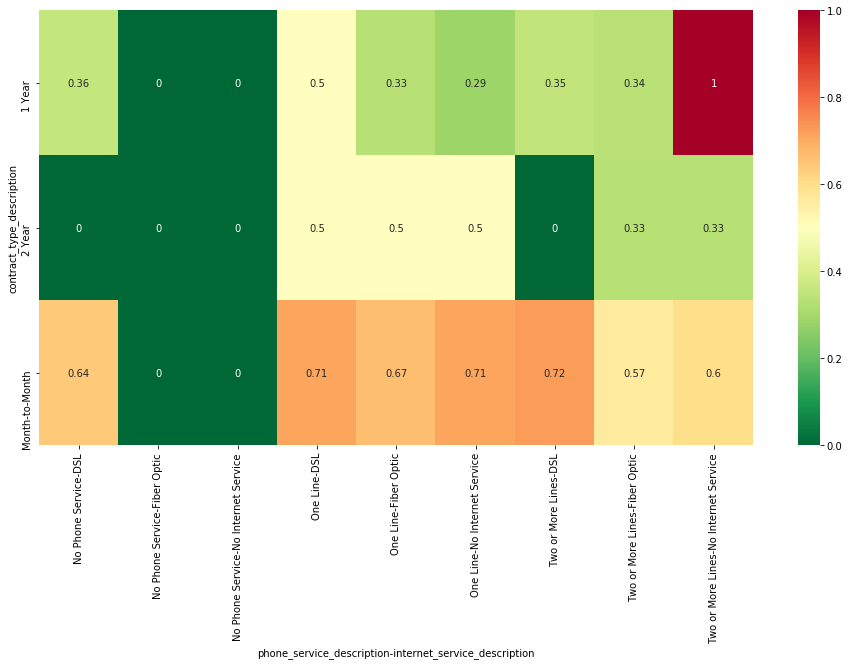

In [111]:
plt.figure(figsize=(16, 8))
sns.heatmap(total_pct_of_single_bundles_churn, cmap='RdYlGn_r', annot=True);

# Singles Average Tenure to Total Average Tenure

In [66]:
total_pct_singles_tenure_churn = round(single_tenure_churn / bundled_tenure, 2)

In [67]:
# Is single churn tenure greater than total churn tenure
total_pct_singles_tenure_churn.replace(0, np.NaN).mean(axis=1)

contract_type_description
1 Year            1.010000
2 Year            0.938000
Month-to-Month    0.774286
dtype: float64

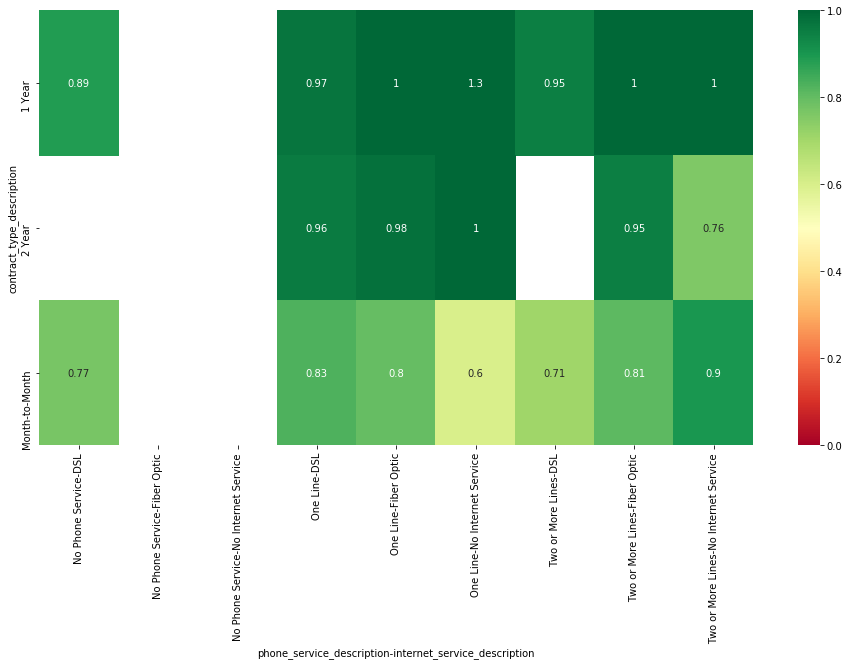

In [68]:
plt.figure(figsize=(16, 8))
sns.heatmap(total_pct_singles_tenure_churn, vmin=0, vmax=1,cmap='RdYlGn', annot=True);

In [ ]:
# https://www.attinternetservice.com/resources/fiber-vs-dsl/
# https://broadbandnow.com/guides/dsl-vs-cable-vs-fiber
# https://www.reviews.org/internet-service/how-much-is-internet/
# https://broadbandmap.fcc.gov/#/provider-detail?version=jun2019&direction=d&hoconums=130077,130235
